Crude oil data: 193 rows
Date range: 2010-01-01 00:00:00 to 2026-01-01 00:00:00
Columns: ['Date', 'Closing Price']
Fuel prices data: 5480 rows
Date range: 2010-01-01 00:00:00 to 2025-01-01 00:00:00
Columns: ['Date', 'LP_95', 'LP_92', 'LAD', 'LSD', 'LK', 'LIK', 'FUR_800', 'FUR_1500_High', 'FUR_1500_Low']
Exchange rates data: 3321 rows
Date range: 2010-05-07 00:00:00 to 2026-01-01 00:00:00
Columns: ['Currency', 'Date', 'Exchange Rate']

GDP data:
    Year  GDP (USD Billions)
0   2023               84.36
1   2022               74.14
2   2021               88.61
3   2020               84.30
4   2019               89.01
5   2018               94.49
6   2017               94.38
7   2016               88.01
8   2015               85.14
9   2014               82.53
10  2013               77.00
11  2012               70.45
12  2011               67.75
13  2010               58.64

GDP Growth data:
    Year  GDP Growth Rate (%)
0   2023                -2.30
1   2022                -7.35
2   2021

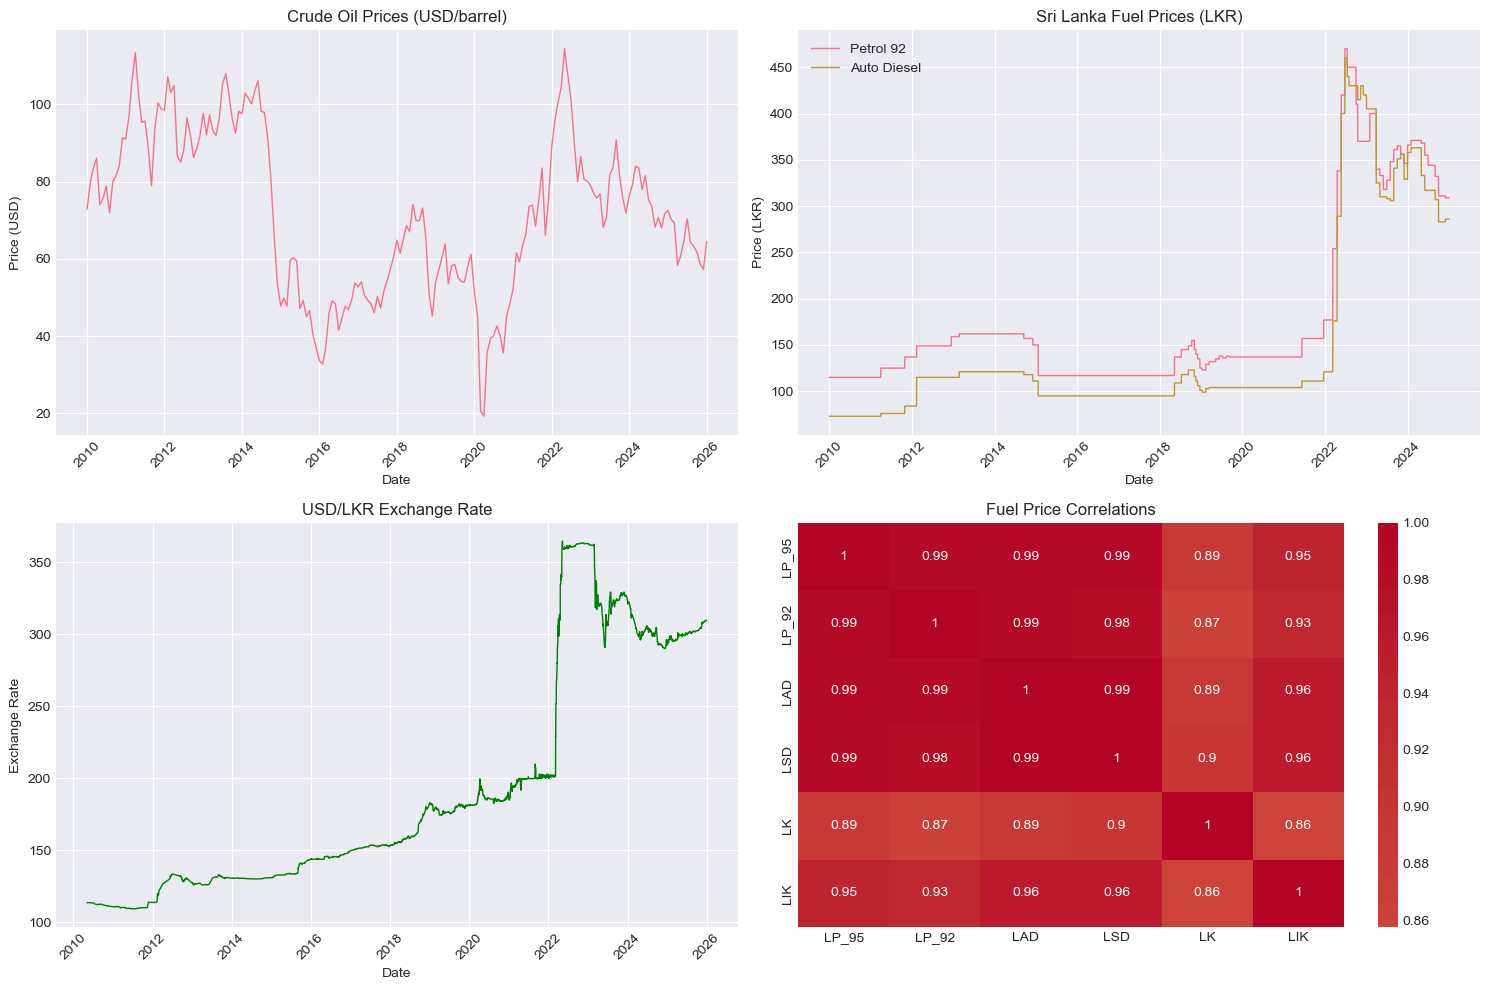

Crude oil daily shape: (5845, 2)
GDP daily shape: (5479, 2)
GDP Growth daily shape: (5479, 2)
Inflation daily shape: (5479, 2)
Merged dataset shape: (5480, 15)
Date range: 2010-01-01 00:00:00 to 2025-01-01 00:00:00
Missing values after merge:
Exchange Rate       2398
GDP_USD_Billions       1
GDP_Growth_Pct         1
Inflation_Rate         1
dtype: int64

After filling:
0 missing values remain
Last date in merged data before filtering: 2025-01-01 00:00:00
After filtering: 2010-01-01 00:00:00 to 2024-12-31 00:00:00
Total rows after filtering: 5479
DATE RANGE SUMMARY AFTER FILTERING
Overall data range: 2010-01-01 00:00:00 to 2024-12-31 00:00:00
Total days: 5479

Coverage by year:
  2010: 365 days (100.0%)
  2011: 365 days (100.0%)
  2012: 366 days (100.0%)
  2013: 365 days (100.0%)
  2014: 365 days (100.0%)
  2015: 365 days (100.0%)
  2016: 366 days (100.0%)
  2017: 365 days (100.0%)
  2018: 365 days (100.0%)
  2019: 365 days (100.0%)
  2020: 366 days (100.0%)
  2021: 365 days (100.0%)
  

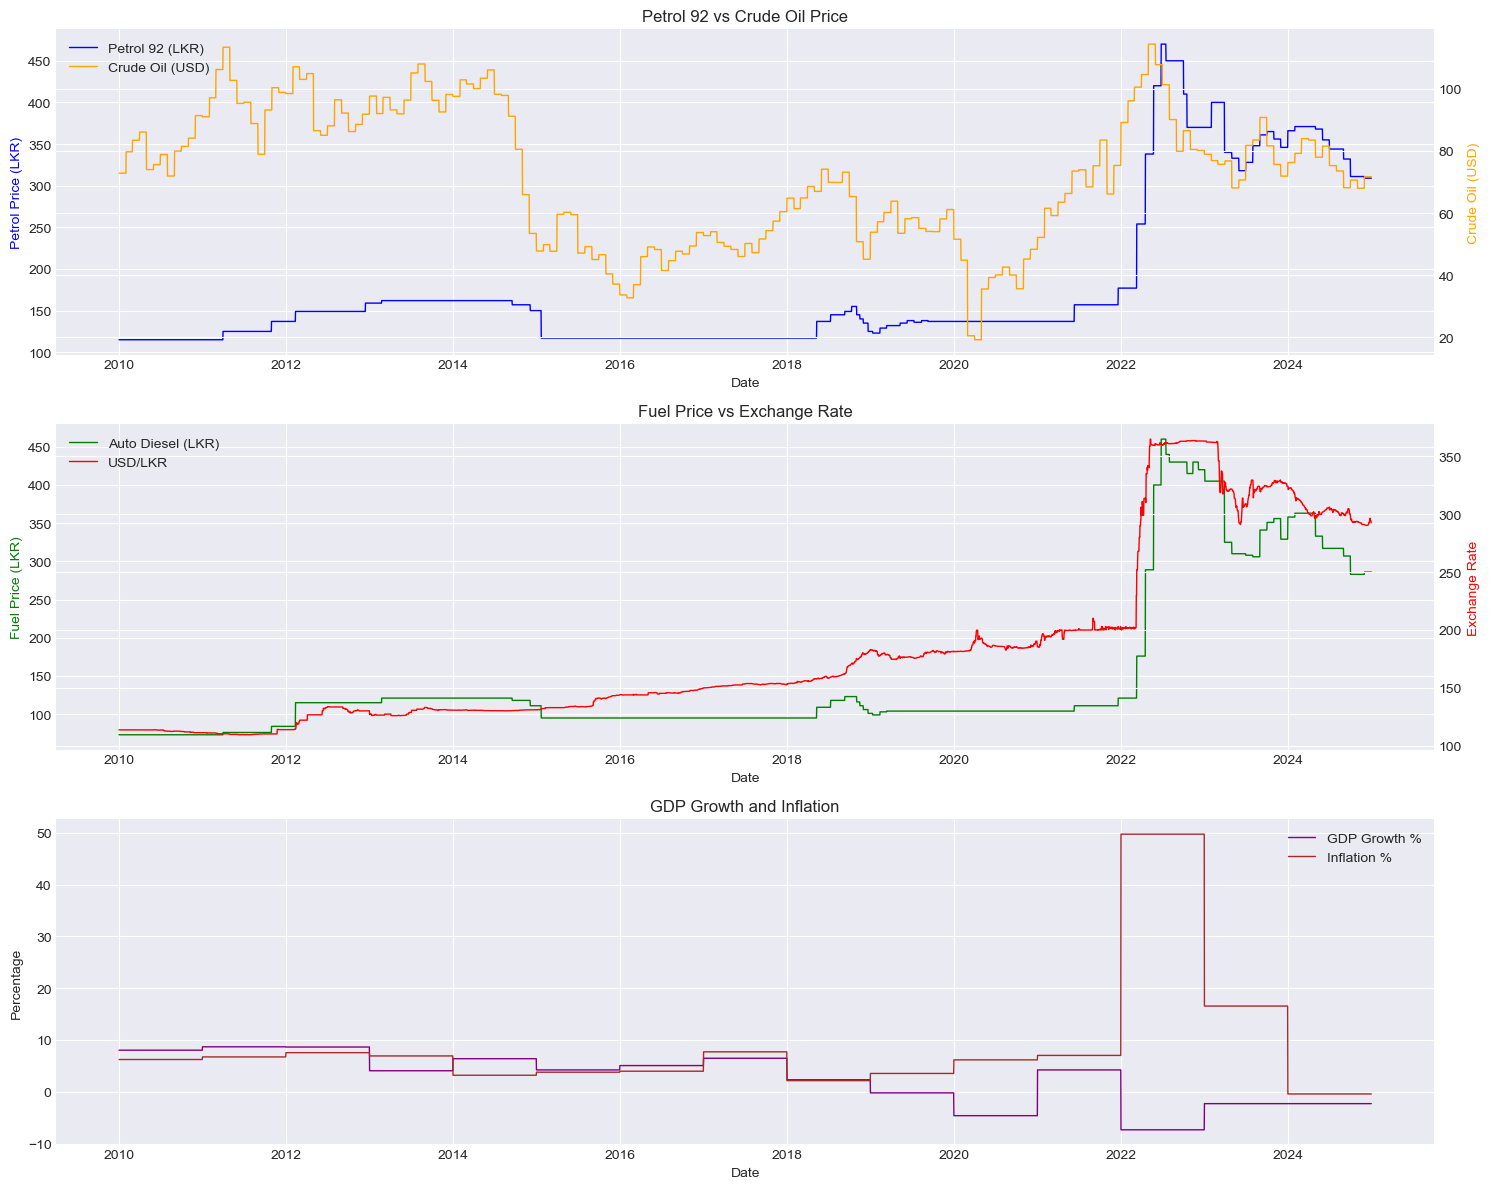

FINAL DATASET INFORMATION
Shape: (5479, 15)
Memory usage: 0.63 MB

Column data types:
Date                datetime64[ns]
LP_95                      float64
LP_92                      float64
LAD                        float64
LSD                        float64
LK                         float64
LIK                        float64
FUR_800                    float64
FUR_1500_High              float64
FUR_1500_Low               float64
Crude_Oil_USD              float64
Exchange Rate              float64
GDP_USD_Billions           float64
GDP_Growth_Pct             float64
Inflation_Rate             float64
dtype: object

First 5 rows:


,Date,LP_95,LP_92,LAD,LSD,LK,LIK,FUR_800,FUR_1500_High,FUR_1500_Low,Crude_Oil_USD,Exchange Rate,GDP_USD_Billions,GDP_Growth_Pct,Inflation_Rate
0,2010-01-01,133.0,115.0,73.0,88.3,51.0,56.0,32.9,32.7,32.7,72.85,113.6975,58.64,8.02,6.22
1,2010-01-02,133.0,115.0,73.0,88.3,51.0,56.0,32.9,32.7,32.7,72.85,113.6975,58.64,8.02,6.22
2,2010-01-03,133.0,115.0,73.0,88.3,51.0,56.0,32.9,32.7,32.7,72.85,113.6975,58.64,8.02,6.22
3,2010-01-04,133.0,115.0,73.0,88.3,51.0,56.0,32.9,32.7,32.7,72.85,113.6975,58.64,8.02,6.22
4,2010-01-05,133.0,115.0,73.0,88.3,51.0,56.0,32.9,32.7,32.7,72.85,113.6975,58.64,8.02,6.22


In [1]:
# %% [markdown]
# # Step 1: Data Preprocessing for Fuel Price Prediction

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# %% [markdown]
# ## Load All Datasets

# %%
# Load crude oil prices (monthly)
crude_oil = pd.read_csv('../raw_data/crude_oil_prices.csv')
crude_oil['Date'] = pd.to_datetime(crude_oil['Date'])
crude_oil = crude_oil.sort_values('Date')
print(f"Crude oil data: {len(crude_oil)} rows")
print(f"Date range: {crude_oil['Date'].min()} to {crude_oil['Date'].max()}")
print("Columns:", crude_oil.columns.tolist())
crude_oil.head()

# %%
# Load Sri Lanka fuel prices (daily)
fuel_prices = pd.read_csv('../raw_data/sl_fuel_daily_2010_2025.csv')
fuel_prices['Date'] = pd.to_datetime(fuel_prices['Date'])
fuel_prices = fuel_prices.sort_values('Date')
print(f"Fuel prices data: {len(fuel_prices)} rows")
print(f"Date range: {fuel_prices['Date'].min()} to {fuel_prices['Date'].max()}")
print("Columns:", fuel_prices.columns.tolist())
fuel_prices.head()

# %%
# Load USD/LKR exchange rates (daily)
exchange_rates = pd.read_csv('../raw_data/usd_lkr_exchange_rates.csv')
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])
exchange_rates = exchange_rates.sort_values('Date')
print(f"Exchange rates data: {len(exchange_rates)} rows")
print(f"Date range: {exchange_rates['Date'].min()} to {exchange_rates['Date'].max()}")
print("Columns:", exchange_rates.columns.tolist())
exchange_rates.head()

# %%
# Load GDP data (yearly)
gdp = pd.read_csv('../raw_data/sri_lanka_gdp_2010_2023.csv')
gdp_growth = pd.read_csv('../raw_data/sri_lanka_gdp_growth.csv')
inflation = pd.read_csv('../raw_data/sri_lanka_inflation.csv')

print("\nGDP data:")
print(gdp)
print("\nGDP Growth data:")
print(gdp_growth)
print("\nInflation data:")
print(inflation)

# %% [markdown]
# ## Data Quality Check and Cleaning

# %%
# Check for missing values in each dataset
print("=== Missing Values ===")
print("\nCrude Oil:")
print(crude_oil.isnull().sum())
print("\nFuel Prices:")
print(fuel_prices.isnull().sum())
print("\nExchange Rates:")
print(exchange_rates.isnull().sum())

# %%
# Check for data inconsistencies
print("\n=== Data Consistency Checks ===")

# Check crude oil for duplicate dates
crude_dupes = crude_oil['Date'].duplicated().sum()
print(f"Crude oil duplicate dates: {crude_dupes}")

# Check fuel prices for duplicate dates
fuel_dupes = fuel_prices['Date'].duplicated().sum()
print(f"Fuel prices duplicate dates: {fuel_dupes}")

# Check exchange rates for duplicate dates
exchange_dupes = exchange_rates['Date'].duplicated().sum()
print(f"Exchange rates duplicate dates: {exchange_dupes}")

# %%
# Handle duplicates if any
if crude_dupes > 0:
    crude_oil = crude_oil.drop_duplicates('Date', keep='last')
if fuel_dupes > 0:
    fuel_prices = fuel_prices.drop_duplicates('Date', keep='last')
if exchange_dupes > 0:
    exchange_rates = exchange_rates.drop_duplicates('Date', keep='last')

print("Duplicates removed where necessary.")

# %% [markdown]
# ## Exploratory Data Analysis

# %%
# Plot crude oil prices over time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Crude Oil
axes[0, 0].plot(crude_oil['Date'], crude_oil['Closing Price'], linewidth=1)
axes[0, 0].set_title('Crude Oil Prices (USD/barrel)')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price (USD)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Fuel Prices - Check column names first
print("Fuel price columns:", fuel_prices.columns.tolist())

# Use the correct column names from your data
fuel_cols = fuel_prices.columns.tolist()

axes[0, 1].plot(fuel_prices['Date'], fuel_prices['LP_92'], label='Petrol 92', linewidth=1)
if 'LAD' in fuel_cols:
    axes[0, 1].plot(fuel_prices['Date'], fuel_prices['LAD'], label='Auto Diesel', linewidth=1)
elif 'Auto_Diesel' in fuel_cols:
    axes[0, 1].plot(fuel_prices['Date'], fuel_prices['Auto_Diesel'], label='Auto Diesel', linewidth=1)
    
axes[0, 1].set_title('Sri Lanka Fuel Prices (LKR)')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price (LKR)')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Exchange Rate
axes[1, 0].plot(exchange_rates['Date'], exchange_rates['Exchange Rate'], linewidth=1, color='green')
axes[1, 0].set_title('USD/LKR Exchange Rate')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Exchange Rate')
axes[1, 0].tick_params(axis='x', rotation=45)

# Correlation heatmap for fuel prices - use available columns
fuel_price_cols = ['LP_95', 'LP_92', 'LAD', 'LSD', 'LK', 'LIK']
available_cols = [col for col in fuel_price_cols if col in fuel_prices.columns]
if len(available_cols) > 1:
    fuel_corr = fuel_prices[available_cols].corr()
    sns.heatmap(fuel_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
    axes[1, 1].set_title('Fuel Price Correlations')
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient columns for correlation', 
                    horizontalalignment='center', verticalalignment='center')
    axes[1, 1].set_title('Fuel Price Correlations')

plt.tight_layout()
plt.savefig('../data/eda_plots.png', dpi=150, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## Handle Different Frequencies (Resampling)

# The main challenge: crude oil is monthly, GDP/inflation are yearly, 
# but we need daily features for prediction

# %%
# Resample crude oil to daily (forward fill)
crude_oil_daily = crude_oil.set_index('Date').resample('D').ffill().reset_index()
print(f"Crude oil daily shape: {crude_oil_daily.shape}")

# %%
# Function to create yearly features at daily level
def create_yearly_features_daily(df_yearly, feature_name, date_range):
    """Convert yearly data to daily with forward fill"""
    df_yearly = df_yearly.copy()
    
    # Handle different column names
    if 'Year' in df_yearly.columns:
        year_col = 'Year'
    elif 'year' in df_yearly.columns:
        year_col = 'year'
    else:
        # Assume first column is year
        year_col = df_yearly.columns[0]
    
    # Get value column (second column)
    value_col = df_yearly.columns[1]
    
    df_yearly['Date'] = pd.to_datetime(df_yearly[year_col].astype(str) + '-12-31')
    
    # Create daily index
    daily_idx = pd.date_range(start=date_range[0], end=date_range[1], freq='D')
    daily_df = pd.DataFrame(index=daily_idx)
    
    # Merge and forward fill
    for _, row in df_yearly.iterrows():
        year_end = row['Date']
        daily_df.loc[daily_df.index <= year_end, feature_name] = row[value_col]
    
    # Forward fill any remaining
    daily_df[feature_name] = daily_df[feature_name].ffill().bfill()
    
    return daily_df.reset_index().rename(columns={'index': 'Date'})

# %%
# Create date range for our target period
start_date = '2010-01-01'
end_date = '2024-12-31'  # Changed to end of 2024
date_range = (start_date, end_date)

# Create daily GDP features
gdp_daily = create_yearly_features_daily(gdp, 'GDP_USD_Billions', date_range)
gdp_growth_daily = create_yearly_features_daily(gdp_growth, 'GDP_Growth_Pct', date_range)
inflation_daily = create_yearly_features_daily(inflation, 'Inflation_Rate', date_range)

print("GDP daily shape:", gdp_daily.shape)
print("GDP Growth daily shape:", gdp_growth_daily.shape)
print("Inflation daily shape:", inflation_daily.shape)

# %% [markdown]
# ## Merge All Datasets

# %%
# Start with fuel prices as base
merged_df = fuel_prices.copy()

# Merge with crude oil
merged_df = pd.merge(merged_df, crude_oil_daily[['Date', 'Closing Price']], 
                     on='Date', how='left')
merged_df.rename(columns={'Closing Price': 'Crude_Oil_USD'}, inplace=True)

# Merge with exchange rates
merged_df = pd.merge(merged_df, exchange_rates[['Date', 'Exchange Rate']], 
                     on='Date', how='left')

# Merge with GDP features
merged_df = pd.merge(merged_df, gdp_daily, on='Date', how='left')
merged_df = pd.merge(merged_df, gdp_growth_daily, on='Date', how='left')
merged_df = pd.merge(merged_df, inflation_daily, on='Date', how='left')

print(f"Merged dataset shape: {merged_df.shape}")
print(f"Date range: {merged_df['Date'].min()} to {merged_df['Date'].max()}")
merged_df.head()

# %%
# Check for any missing values after merge
missing = merged_df.isnull().sum()
print("Missing values after merge:")
print(missing[missing > 0])

# Forward fill any remaining missing values
merged_df = merged_df.ffill().bfill()
print("\nAfter filling:")
print(merged_df.isnull().sum().sum(), "missing values remain")

# %% [markdown]
# ## Filter to Complete Years Only (Remove 2025)

# %%
# Check the last date in the dataset
print(f"Last date in merged data before filtering: {merged_df['Date'].max()}")

# Filter to exclude 2025 (only 1 day)
merged_df = merged_df[merged_df['Date'] <= '2024-12-31'].copy()
print(f"After filtering: {merged_df['Date'].min()} to {merged_df['Date'].max()}")
print(f"Total rows after filtering: {len(merged_df)}")

# Reset index after filtering
merged_df = merged_df.reset_index(drop=True)

# %% [markdown]
# ## Check Coverage After Filtering

# %%
print("="*50)
print("DATE RANGE SUMMARY AFTER FILTERING")
print("="*50)
print(f"Overall data range: {merged_df['Date'].min()} to {merged_df['Date'].max()}")
print(f"Total days: {(merged_df['Date'].max() - merged_df['Date'].min()).days + 1}")

print("\nCoverage by year:")
for year in range(2010, 2025):
    year_data = merged_df[merged_df['Date'].dt.year == year]
    days_in_year = 366 if (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)) else 365
    coverage_pct = len(year_data) / days_in_year * 100
    print(f"  {year}: {len(year_data)} days ({coverage_pct:.1f}%)")
    
    # Check for missing dates within the year
    if len(year_data) < days_in_year:
        date_range = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
        missing_dates = set(date_range) - set(year_data['Date'])
        if missing_dates:
            print(f"    Missing {len(missing_dates)} dates in {year}")

# %% [markdown]
# ## Save Preprocessed Dataset

# %%
# Save the merged dataset (filtered to 2010-2024)
merged_df.to_csv('../data/merged_fuel_data.csv', index=False)
print("Merged dataset saved to '../data/merged_fuel_data.csv'")
print(f"Final dataset shape: {merged_df.shape}")
print(f"Date range: {merged_df['Date'].min()} to {merged_df['Date'].max()}")

# Also save a sample for quick testing
merged_df.head(1000).to_csv('../data/merged_fuel_data_sample.csv', index=False)
print("Sample dataset saved to '../data/merged_fuel_data_sample.csv'")

# %% [markdown]
# ## Data Summary Statistics

# %%
# Summary statistics for key columns
key_cols = []
if 'LP_92' in merged_df.columns:
    key_cols.append('LP_92')
if 'LAD' in merged_df.columns:
    key_cols.append('LAD')
if 'Crude_Oil_USD' in merged_df.columns:
    key_cols.append('Crude_Oil_USD')
if 'Exchange Rate' in merged_df.columns:
    key_cols.append('Exchange Rate')
if 'GDP_USD_Billions' in merged_df.columns:
    key_cols.append('GDP_USD_Billions')
if 'GDP_Growth_Pct' in merged_df.columns:
    key_cols.append('GDP_Growth_Pct')
if 'Inflation_Rate' in merged_df.columns:
    key_cols.append('Inflation_Rate')

summary = merged_df[key_cols].describe()
print("Summary Statistics:")
print(summary)

# %%
# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

print("Outlier counts:")
for col in key_cols:
    outliers = detect_outliers(merged_df, col)
    print(f"{col}: {outliers} outliers")

# %% [markdown]
# ## Data Quality Issues Identified

# 1. **Different frequencies**: Successfully resampled to daily
# 2. **GDP and inflation data**: Only yearly, forward filled - introduces some bias
# 3. **Missing exchange rates**: Some dates missing (exchange data starts 2010-05-07), forward filled
# 4. **Fuel price changes**: Only change on revision dates, otherwise constant
# 5. **Outliers**: Some extreme values during 2022 economic crisis - these are real events, not errors
# 6. **2025 data**: Removed due to incomplete coverage (only 1 day)

# %%
# Visualize the final merged data
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Petrol 92 vs Crude Oil
ax1 = axes[0]
ax1.plot(merged_df['Date'], merged_df['LP_92'], label='Petrol 92 (LKR)', color='blue', linewidth=1)
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Crude_Oil_USD'], label='Crude Oil (USD)', color='orange', linewidth=1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Petrol Price (LKR)', color='blue')
ax2.set_ylabel('Crude Oil (USD)', color='orange')
ax1.set_title('Petrol 92 vs Crude Oil Price')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Auto Diesel vs Exchange Rate
ax1 = axes[1]
if 'LAD' in merged_df.columns:
    ax1.plot(merged_df['Date'], merged_df['LAD'], label='Auto Diesel (LKR)', color='green', linewidth=1)
else:
    ax1.plot(merged_df['Date'], merged_df['LP_92'], label='Petrol 92 (LKR) - Diesel not available', color='green', linewidth=1)
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Exchange Rate'], label='USD/LKR', color='red', linewidth=1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Fuel Price (LKR)', color='green')
ax2.set_ylabel('Exchange Rate', color='red')
ax1.set_title('Fuel Price vs Exchange Rate')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# GDP Growth and Inflation
axes[2].plot(merged_df['Date'], merged_df['GDP_Growth_Pct'], label='GDP Growth %', color='purple', linewidth=1)
axes[2].plot(merged_df['Date'], merged_df['Inflation_Rate'], label='Inflation %', color='brown', linewidth=1)
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Percentage')
axes[2].set_title('GDP Growth and Inflation')
axes[2].legend()

plt.tight_layout()
plt.savefig('../data/final_merged_plot.png', dpi=150, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## Final Dataset Info

# %%
print("="*50)
print("FINAL DATASET INFORMATION")
print("="*50)
print(f"Shape: {merged_df.shape}")
print(f"Memory usage: {merged_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nColumn data types:")
print(merged_df.dtypes)
print("\nFirst 5 rows:")
merged_df.head()